In [1]:
cd /orange/adamginsburg/ALMA_IMF/catalogs/

/orange/adamginsburg/ALMA_IMF/catalogs


In [2]:
ls

ALMA-IMF_hotcore_and_core_1mm_histogram.png
ALMA-IMF_sizes.png
cataloguesss/
cataloguesss.zip
getsfcat_20210511.zip
hot_core_cat/
hot_core_cat.zip*
ipython_log_2022-06-16.py
SgrB2_vs_ALMA-IMF_histogram.png
W51-E-getsf.cat*
W51-E.sw.sources.fin.ok_dec2020 (1).cat*
W51-E.sw.sources.fin.ok_dec2020.cat*
W51-IRS2-getsf.cat*
W51-IRS2.sw.sources.fin.ok_dec2020 (1).cat*
W51-IRS2.sw.sources.fin.ok_dec2020.cat*


In [3]:
%run //orange/adamginsburg/ALMA_IMF/reduction/reduction/distances.py

In [4]:
from astropy.io import ascii
from astropy import units as u
cats = {key: ascii.read(f'cataloguesss/{key.split(".")[0]}-getsf.cat',
           data_start=0, format='commented_header', header_start=120,  comment="!")
        for key in distances}

In [5]:
cats.keys()

dict_keys(['W43-MM1', 'W43-MM2', 'W43-MM3', 'W51-E', 'W51-IRS2', 'G333.60', 'G338.93', 'G010.62', 'G008.67', 'G012.80', 'G337.92', 'G327.29', 'G351.77', 'G353.41', 'G328.25'])

In [6]:
hotcorecats = {key: ascii.read(f'hot_core_cat/{key}_GExt2D.cat', 
                               header_start=4, format='commented_header', comment="!")
               for key in distances}

In [7]:
from matplotlib.patches import Ellipse, Circle

In [8]:
def cattoellipses(cat):
    return [Circle((row['alpha'], row['delta']), radius=row['fwhm']/3600, facecolor='none', edgecolor='r')
            for row in cat]
    return [Ellipse((row['alpha'], row['delta']), width=row['dx']/3600, height=row['dy']/3600, angle=row['pa'], facecolor='none', edgecolor='r')
            for row in cat]

In [9]:
%matplotlib widget

In [10]:
import pylab as pl

In [11]:
def make_scatterplot(field='W43-MM1'):
    fig = pl.figure()

    corecat = cats[field]
    hotcat = hotcorecats[field]
    pl.scatter(corecat['WCS_ACOOR'], corecat['WCS_DCOOR'])
    pl.scatter(hotcat['alpha'], hotcat['delta'])
    for ell in cattoellipses(hotcat):
        pl.gca().add_artist(ell)
    pl.gca().set_xlim(pl.gca().get_xlim()[::-1])
        
    return fig

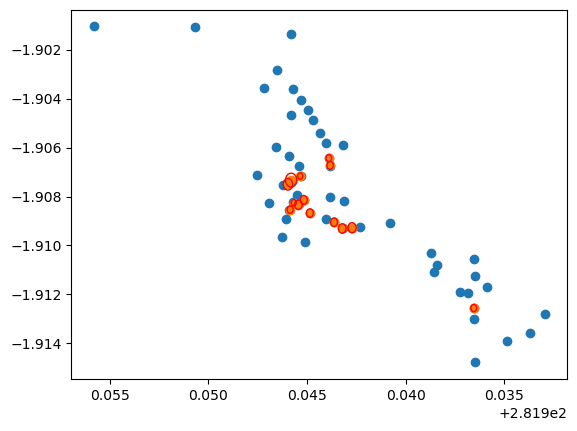

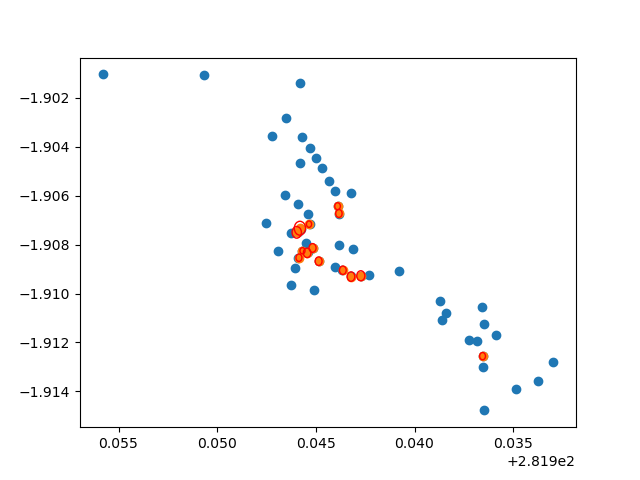

In [12]:
make_scatterplot('W43-MM1')

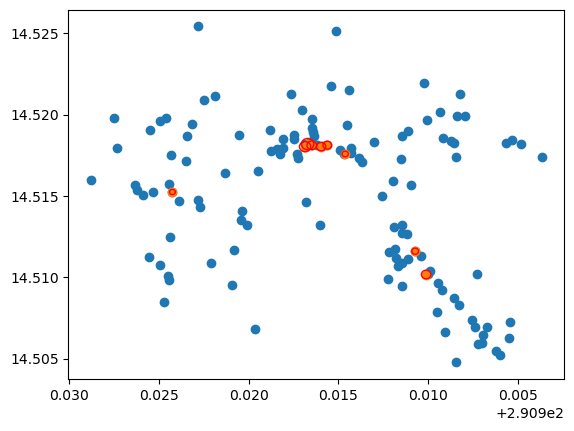

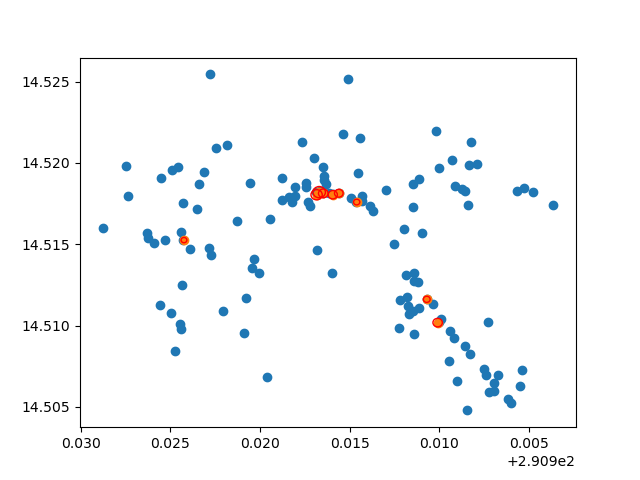

In [13]:
make_scatterplot('W51-IRS2')

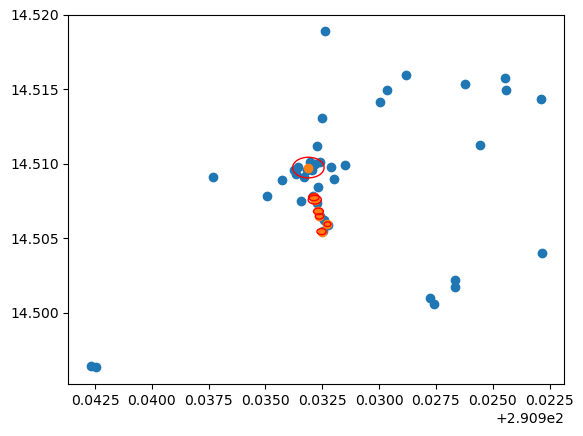

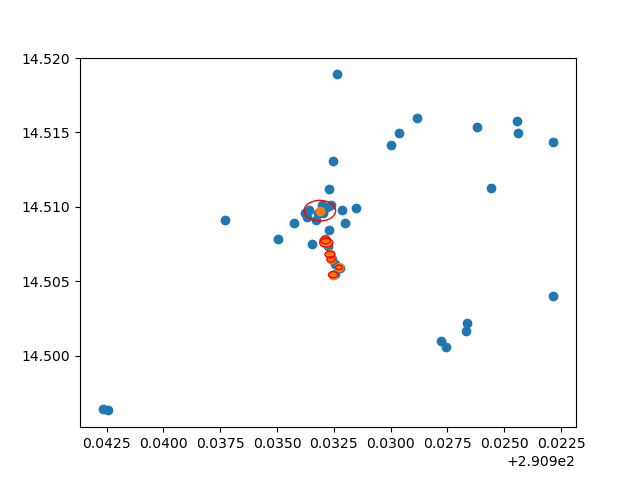

In [14]:
make_scatterplot('W51-E')

# How big are hot cores?

In [15]:
for field in hotcorecats:
    cat = hotcorecats[field]
    distance = u.Quantity(distances[field], u.kpc)
    cat['fwhm_au'] = (cat['fwhm']*u.arcsec * distance).to(u.au, u.dimensionless_angles())
    print(field, (cat['fwhm_au'] > 6000*u.au).sum())

W43-MM1 0
W43-MM2 0
W43-MM3 0
W51-E 1
W51-IRS2 2
G333.60 0
G338.93 0
G010.62 0
G008.67 0
G012.80 0
G337.92 0
G327.29 1
G351.77 0
G353.41 0
G328.25 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


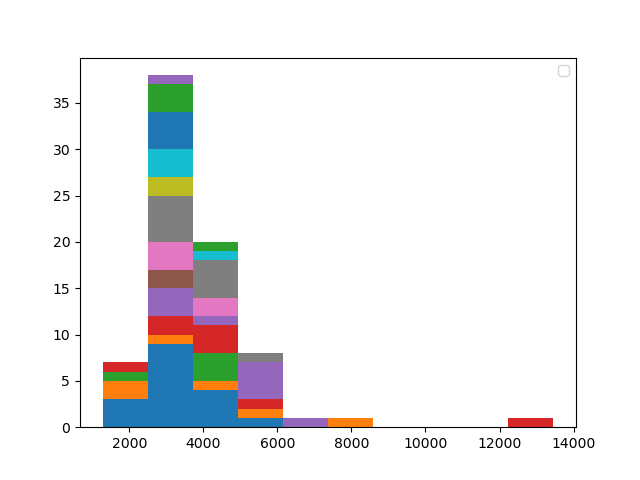

In [16]:
sizes = [cat['fwhm_au'] for cat in hotcorecats.values()]
pl.figure()
pl.clf()
pl.hist(sizes, stacked=True)
pl.legend()

In [17]:
almaimf_continuum_sizes = [ 3930.3  ,  3455.1  ,  3878.05 ,  5328.95 ,  3589.85 ,  3958.9  ,
        3962.75 ,  3738.35 ,  3506.25 ,  3874.75 ,  3577.75 ,  5149.65 ,
        3447.95 ,  3702.6  ,  3690.5  ,  3208.7  ,  3241.15 ,  3466.1  ,
        4262.5  ,  3714.7  ,  3323.1  ,  2852.3  ,  3792.8  ,  3076.15 ,
        4640.35 ,  3284.6  ,  4537.5  ,  3705.9  ,  4403.3  ,  4588.1  ,
        4972.   ,  5324.   ,  4165.15 ,  4205.85 ,  4268.55 ,  4973.65 ,
        3255.45 ,  3709.75 ,  4352.7  ,  3972.65 ,  3512.85 ,  4052.4  ,
        4593.6  ,  3425.4  ,  4711.85 ,  3781.25 ,  3949.55 ,  3061.3  ,
        8156.5  ,  3284.05 ,  8684.5  ,  3561.25 ,  3975.95 ,  3682.25 ,
        3556.3  ,  8200.5  ,  3027.75 ,  5874.   ,  4435.75 ,  5177.15 ,
        5610.6  ,  5972.4  ,  3605.04 ,  4595.4  ,  5502.6  ,  3800.52 ,
       16399.8  ,  5729.4  ,  4735.8  ,  3704.4  ,  4839.48 ,  4182.3  ,
        3529.44 ,  4896.18 ,  6728.4  ,  3230.28 ,  3663.36 ,  3083.4  ,
        3660.66 ,  3400.38 ,  3852.36 ,  5219.64 ,  3878.82 ,  3383.1  ,
        3001.32 ,  3997.08 ,  3825.36 ,  4064.58 ,  3603.42 ,  3804.3  ,
        3839.4  ,  3269.7  ,  4392.36 ,  3074.76 ,  3815.1  ,  3812.4  ,
        5164.56 ,  3063.96 ,  5481.   ,  5068.44 ,  3052.62 ,  6814.8  ,
       11988.   ,  3125.52 ,  8899.2  ,  3741.12 ,  3195.18 ,  5551.2  ,
        5038.74 ,  4861.62 ,  4582.98 ,  6031.8  ,  3952.26 ,  3378.78 ,
        4759.02 ,  4068.9  ,  4679.1  ,  3276.18 ,  5917.8  ,  3506.58 ,
        3579.66 ,  3105.48 ,  5300.4  ,  4279.8  ,  4624.2  ,  5573.4  ,
        5346.6  ,  5930.4  ,  6610.8  ,  6652.8  ,  5392.8  ,  2876.16 ,
        5266.8  ,  5119.8  ,  4036.62 ,  5615.4  ,  4072.74 , 10966.2  ,
        4750.2  ,  5535.6  ,  3605.28 ,  5556.6  ,  4531.8  ,  5203.8  ,
        4468.8  ,  3881.64 ,  4930.8  ,  6279.   ,  4029.06 ,  3891.72 ,
        6069.   ,  6875.4  ,  5216.4  ,  5241.6  ,  3927.42 ,  7484.4  ,
        7837.2  ,  4063.5  ,  4582.2  ,  4863.6  ,  3827.46 ,  5443.2  ,
        4300.8  ,  4561.2  ,  5098.8  ,  5048.4  ,  3963.96 ,  4313.4  ,
        5107.2  ,  5359.2  ,  3422.16 ,  3486.42 ,  5901.   ,  4582.2  ,
        3465.54 ,  3779.1  ,  3352.05 ,  3368.43 ,  3354.39 ,  3919.5  ,
        3157.05 ,  5530.2  ,  3812.25 ,  3942.9  ,  3389.1  ,  5709.6  ,
        4134.   ,  3399.24 ,  7420.05 ,  6459.75 ,  5400.45 ,  3525.39 ,
        3572.91 ,  3515.985,  3165.525,  5529.15 ,  3876.345,  7860.6  ,
        4532.715,  5237.1  ,  3629.34 ,  3170.475, 10677.15 ,  4017.42 ,
        3543.705,  9603.   ,  3987.225,  4450.545,  6682.5  ,  3194.73 ,
        4734.675,  4321.35 ,  3566.475,  4002.57 ,  3050.685,  4692.   ,
        3267.06 ,  3050.14 ,  3614.2  ,  3832.8  ,  6588.   ,  4425.6  ,
        3376.8  ,  3456.   ,  3828.   ,  7140.   ,  5640.   ,  3475.2  ,
        3650.4  ,  4118.4  ,  3604.8  ,  6019.2  ,  9199.2  ,  3232.8  ,
        7567.2  ,  4214.4  ,  4372.8  ,  9432.   ,  3744.   ,  4706.4  ,
        4706.4  ,  4586.4  ,  4994.4  ,  3326.4  ,  6055.2  ,  4327.2  ,
        3880.8  ,  3720.   ,  4848.   ,  4338.9  ,  4989.6  ,  4071.6  ,
        3269.7  ,  4876.2  ,  3169.8  ,  3931.2  ,  4098.6  ,  5794.2  ,
        3739.5  ,  5350.   ,  4460.   ,  4077.5  ,  3000.   ,  4242.5  ,
        3095.   ,  3967.5  ,  3297.5  ,  3475.   ,  2905.   ,  4287.5  ,
        4397.5  ,  4097.5  ,  2837.5  ,  3402.5  ,  4585.   ,  4820.   ,
        5746.   ,  4292.   ,  3252.   ,  3112.   , 12216.   ,  4242.   ,
        3954.   ,  5180.   ,  3114.   ,  4068.   ,  3196.   ,  3266.   ,
        4524.   ,  5216.   ,  4252.   ,  5952.   ,  3828.   ,  4008.   ,
        5368.   ,  3142.   ,  3682.   ,  3732.   ,  3756.   ,  3414.   ,
        3730.   ,  3185.   ,  4527.5  ,  2885.   ,  3345.   ,  3390.   ]

NameError: name 'np' is not defined

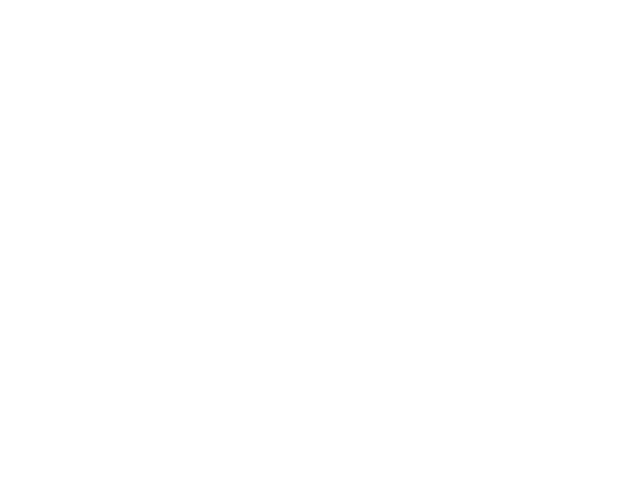

In [18]:
pl.figure()
bins = np.linspace(1800, 14000)
pl.hist(almaimf_continuum_sizes, bins=bins)
pl.hist([y for x in sizes for y in x], bins=bins)
pl.xlabel("Size [AU]")
pl.ylabel("Number of hot cores")

In [ ]:
import numpy as np

In [ ]:
pl.figure()
sizes_ = [y for x in sizes for y in x]
pl.plot(sorted(sizes_), np.arange(len(sizes_))[::-1])
pl.xlabel("Size [AU]")
pl.ylabel("Number of hot cores")

In [ ]:
pl.figure()
sizes_ = [y for x in sizes for y in x]
pl.loglog(sorted(sizes_), np.arange(len(sizes_))[::-1])
pl.xlabel("Size [AU]")
pl.ylabel("Number of hot cores")

In [ ]:
len(sizes_)

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [ ]:
for field in hotcorecats:
    corecat = cats[field]
    hotcat = hotcorecats[field]
    coords_cores = SkyCoord(corecat['WCS_ACOOR'], corecat['WCS_DCOOR'], frame='fk5', unit=(u.deg, u.deg))
    hot_coords =  SkyCoord(hotcat['alpha'], hotcat['delta'], frame='fk5', unit=(u.deg, u.deg))
    closest, sep, sep3d = coords_cores.match_to_catalog_sky(hot_coords, nthneighbor=1)
    fwhms_hotcores = hotcat['fwhm'][closest]*u.arcsec / 2 # divide by 2 to go from FWHM->HWHM
    is_within_hotcore = sep < fwhms_hotcores
    corecat['is_in_hotcore'] = is_within_hotcore
    print(f"{field}: {len(corecat)-len(hotcat)} cores, {is_within_hotcore.sum()-len(hotcat)} within hot cores ({(is_within_hotcore.sum()-len(hotcat))/(len(corecat)-len(hotcat))*100:0.1f}%)")

In [ ]:
pl.figure(figsize=(12,8))
pl.rcParams['font.size'] = 18
flxs = []
flxs_hot = []
for key in cats:
    cat = cats[key]
    catmask = (abs(cat['SIGN'] > 1))
    flx_b6 = (cat['FXT_BST01'][catmask]*u.Jy * (distances[key]*u.kpc)**2).to(u.Jy*u.kpc**2).value
    flxs.append(flx_b6)
    flx_b6_hot = (cat['FXT_BST01'][catmask & cat['is_in_hotcore']]*u.Jy * (distances[key]*u.kpc)**2).to(u.Jy*u.kpc**2).value
    flxs_hot.append(flx_b6_hot)
pl.hist([y for x in flxs for y in x], histtype='step', bins=np.geomspace(0.003,106,30), color=['darkgreen'],
       label="Continuum cores")
pl.hist(flxs_hot, histtype='stepfilled', stacked=True, bins=np.geomspace(0.003,106,30), color=['darkred']*15,
       label="Hot cores")

pl.legend(loc='best')
pl.semilogx()
pl.loglog()
pl.ylabel("Number of Sources")
pl.xlabel("1mm Luminosity (F$_\\nu$ d$^2$ [Jy kpc$^2$])")
pl.savefig("ALMA-IMF_hotcore_and_core_1mm_histogram.png", bbox_inches='tight')

In [ ]:
pwd

In [ ]:
for field in hotcorecats:
    hotcorecats[field].write(f'hot_core_cat/{field}_GExt2D.fits', overwrite=True)
    cats[field].write(f'cataloguesss/{field}-getsf.fits', overwrite=True)

In [ ]:
from astroquery.splatalogue import Splatalogue
from spectral_cube import SpectralCube

In [ ]:
field = 'W43-MM2'
cubes = [SpectralCube.read(f'/orange/adamginsburg/ALMA_IMF/RestructuredImagingResults/{field}/B6/fullcubes_12m/{field}_B6_spw{ii}_12M_spw{ii}.JvM.image.pbcor.statcont.contsub.fits')
         for ii in range(8)]

In [ ]:
for cube in cubes:
    print(cube.find_lines(chemical_name='CH3OCHO', line_lists=['SLAIM'], energy_max=350, energy_type='eu_k'))

In [ ]:
restfreqs = [233.122063, 233.14077, 233.166105, 233.169459,  231.938592,  231.955208 , 231.610245, 231.61182 ]*u.GHz
labels = '18(9,10)-18(8,11)E 18(9,9)-18(8,10)E 18(9,9)-18(8,10)A 18(9,10)-18(8,11)A 20(9,12)-20(8,13)E 20(9,11)-20(8,12)E 27(2,25)-27(1,26)A 27(2,25)-27(2,26)A'.split()

In [ ]:
restfreqs = [233.122063, 233.14077, 233.166105, 233.169459, 231.019102,  231.045948, 216.210844, 216.21651]*u.GHz
labels = '18(9,10)-18(8,11)E 18(9,9)-18(8,10)E 18(9,9)-18(8,10)A 18(9,10)-18(8,11)A 12(4,9)-11(3,8)E 12(4,9)-11(3,8)A 19(1,18)-18(1,17)E 19(1,18)-18(1,17)A'.split()

In [ ]:
restfreqs = [233.122063, 233.14077, 233.166105, 233.169459, 231.610245,  231.045948, 216.210844, 216.21651]*u.GHz
labels = '18(9,10)-18(8,11)E 18(9,9)-18(8,10)E 18(9,9)-18(8,10)A 18(9,10)-18(8,11)A 27(2,25)-27(1,26)A 12(4,9)-11(3,8)A 19(1,18)-18(1,17)E 19(1,18)-18(1,17)A'.split()

In [ ]:
# get restvels

In [ ]:
%run //orange/adamginsburg/ALMA_IMF/reduction/reduction/imaging_parameters.py

In [ ]:
import regions

In [ ]:
hotcorecats[field]

In [ ]:
from astropy import constants
import warnings

In [ ]:
pl.close('all')

In [ ]:
for field in hotcorecats:
#for field in ['W51-E']:
    corecoords = SkyCoord(cats[field]['WCS_ACOOR'], cats[field]['WCS_DCOOR'], frame='fk5', unit=(u.deg, u.deg))

    cubes = [SpectralCube.read(f'/orange/adamginsburg/ALMA_IMF/RestructuredImagingResults/{field}/B6/fullcubes_12m/{field}_B6_spw{ii}_12M_spw{ii}.JvM.image.pbcor.statcont.contsub.fits')
             for ii in range(8)]
    vlsr = u.Quantity(field_vlsr[field])
    
    for row in hotcorecats[field]:
        reg = regions.RectangleSkyRegion(center=SkyCoord(row['alpha'], row['delta'], frame='fk5', unit=(u.deg, u.deg)), width=row['fwhm']*u.arcsec*3, height=row['fwhm']*u.arcsec*3)
        ell = regions.EllipseSkyRegion(center=SkyCoord(row['alpha'], row['delta'], frame='fk5', unit=(u.deg, u.deg)), width=row['dx']*u.arcsec, height=row['dy']*u.arcsec, angle=row['pa']*u.deg)
        #print(reg, vlsr)
    
        fig = pl.figure(figsize=(12,8))
        for cube in cubes:
            for ii,(restf,label) in enumerate(zip(restfreqs, labels)):
                #if cube.spectral_axis.min() < restf*(1-(vlsr+10*u.km/u.s)/constants.c) and cube.spectral_axis.max() > restf*(1+(vlsr-10*u.km/u.s)/constants.c):
                if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
                    with warnings.catch_warnings():
                        warnings.filterwarnings('ignore')
                        slab = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restf).spectral_slab(vlsr-10*u.km/u.s, vlsr+10*u.km/u.s)
                    if slab.shape[0] < 2:
                        print(row, slab, restf, )
                        continue
                    slab = slab.subcube_from_regions([reg])
                    ax = pl.subplot(2,4,ii+1, projection=slab.wcs.celestial)
                    ax.imshow(slab.moment0().value, cmap='inferno')
                    axlims = ax.axis()
                    ax.scatter(corecoords.ra, corecoords.dec, transform=ax.get_transform('fk5'), facecolor='none', ec='g')
                    ax.axis(axlims)
                    ax.coords[0].set_axislabel("RA")
                    ax.coords[1].set_axislabel("Dec")
                    ell.to_pixel(ax.wcs).plot(ax=ax, facecolor='none', edgecolor='w', linewidth=0.5, linestyle='--')
                    ax.set_title(label)
                    if ii in range(4):
                        ax.coords[0].set_axislabel("")
                        ax.coords[0].set_ticklabel_visible(False)
                    if ii in (1,2,3,5,6,7):
                        ax.coords[1].set_axislabel("")
                        ax.coords[1].set_ticklabel_visible(False)

                    # scalebar
                    blc = ax.wcs.pixel_to_world(1,1)
                    brc = blc.ra - ((5000*u.au) / u.Quantity(distances[field], u.kpc)).to(u.arcsec, u.dimensionless_angles())
                    brp,_ = ax.wcs.world_to_pixel(SkyCoord(ra=brc, dec=blc.dec, frame='fk5'))
                    ax.plot([1,brp], [1,1], color='w')
                    ax.text((brp+1)/2., 3, '5000 AU', ha='center', color='w')
            
        pl.suptitle(f'{field} HC{row["ID"]}')
        pl.tight_layout()
        fig.savefig(f'/orange/adamginsburg/ALMA_IMF/hotcores/melisse_cat_moment_figures/{field}_{row["ID"]}_CH3OCHOmoments.png', bbox_inches='tight')
    pl.close(fig.number)
    pl.close('all')

In [ ]:
nx,ny=6,6
#for field in hotcorecats:
for field in ['W51-E']:
    corecoords = SkyCoord(cats[field]['WCS_ACOOR'], cats[field]['WCS_DCOOR'], frame='fk5', unit=(u.deg, u.deg))

    cubes = [SpectralCube.read(f'/orange/adamginsburg/ALMA_IMF/RestructuredImagingResults/{field}/B6/fullcubes_12m/{field}_B6_spw{ii}_12M_spw{ii}.JvM.image.pbcor.statcont.contsub.fits')
             for ii in range(8)]
    vlsr = u.Quantity(field_vlsr[field])

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        linelists = [cube.find_lines(chemical_name='CH3OCHO', line_lists=['SLAIM'], energy_max=300, energy_type='eu_k') for cube in cubes]
    nlines = sum(map(len, linelists))
    print(f"Found {nlines}")
    restfreqs = u.Quantity([x for linelist in linelists for x in linelist['Freq-GHz(rest frame,redshifted)']], u.GHz)
    labels = [x for linelist in linelists for x in linelist['Resolved QNs']]
    rl = sorted(zip(labels, restfreqs))
    labels = [x[0] for x in rl]
    restfreqs = u.Quantity([x[1] for x in rl])
    
    for row in hotcorecats[field]:
        print(field,row['ID'])
        reg = regions.RectangleSkyRegion(center=SkyCoord(row['alpha'], row['delta'], frame='fk5', unit=(u.deg, u.deg)), width=row['fwhm']*u.arcsec*3, height=row['fwhm']*u.arcsec*3)
        ell = regions.EllipseSkyRegion(center=SkyCoord(row['alpha'], row['delta'], frame='fk5', unit=(u.deg, u.deg)), width=row['dx']*u.arcsec, height=row['dy']*u.arcsec, angle=row['pa']*u.deg)
        #print(reg, vlsr)
    
        fig = pl.figure(figsize=(24,24))
        ii = 1
        
        for (restf,label) in (zip(restfreqs, labels)):        

            for cube in cubes:


                #if cube.spectral_axis.min() < restf*(1-(vlsr+10*u.km/u.s)/constants.c) and cube.spectral_axis.max() > restf*(1+(vlsr-10*u.km/u.s)/constants.c):
                if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
                    with warnings.catch_warnings():
                        warnings.filterwarnings('ignore')
                        slab = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restf).spectral_slab(vlsr-10*u.km/u.s, vlsr+10*u.km/u.s)
                    if slab.shape[0] < 2:
                        print(f"No matches for {row['ID']} {restf}")
                        continue
                    slab = slab.subcube_from_regions([reg])
                    ax = pl.subplot(nx,ny,ii, projection=slab.wcs.celestial)
                    ax.imshow(slab.moment0().value, cmap='inferno')
                    axlims = ax.axis()
                    ax.scatter(corecoords.ra, corecoords.dec, transform=ax.get_transform('fk5'), facecolor='none', ec='g')
                    ax.axis(axlims)
                    ax.coords[0].set_axislabel("RA")
                    ax.coords[1].set_axislabel("Dec")
                    ell.to_pixel(ax.wcs).plot(ax=ax, facecolor='none', edgecolor='w', linewidth=0.5, linestyle='--')
                    ax.set_title(label)#, fontsize=14)
                    if ii <= (nx*(ny-1)):
                        ax.coords[0].set_axislabel("")
                        ax.coords[0].set_ticklabel_visible(False)
                    else:
                        ax.coords[0].set_ticklabel(rotation=45, pad=40) # without the pad, this will sometimes overlap with the axis boundary
                    if ii % nx != 1:
                        ax.coords[1].set_axislabel("")
                        ax.coords[1].set_ticklabel_visible(False)
                        

                    # scalebar
                    xlc = 0.75*slab.shape[2]
                    blc = ax.wcs.pixel_to_world(xlc,1)
                    brc = blc.ra - ((5000*u.au) / u.Quantity(distances[field], u.kpc)).to(u.arcsec, u.dimensionless_angles())
                    brp,_ = ax.wcs.world_to_pixel(SkyCoord(ra=brc, dec=blc.dec, frame='fk5'))
                    ax.plot([xlc,brp], [1,1], color='w')
                    ax.text((brp+xlc)/2., 3, '5000 AU', ha='center', color='w')
                    ii += 1

                if ii > nx*ny:
                    print("Done")
                    break
            if ii > nx*ny:
                print("Done")
                break

        pl.suptitle(f'{field} HC{row["ID"]}')
        pl.tight_layout()
        fig.savefig(f'/orange/adamginsburg/ALMA_IMF/hotcores/melisse_cat_moment_figures/{field}_{row["ID"]}_allCH3OCHOmoments.png', bbox_inches='tight')
    pl.close(fig.number)
    pl.close('all')

In [ ]:
linelists = [cube.find_lines(chemical_name='CH3OCHO', line_lists=['SLAIM'], energy_max=350, energy_type='eu_k', velocity_offset=vlsr, velocity_convention='radio', rest_value=cube.spectral_axis.mean()) for cube in cubes]
nlines = sum(map(len, linelists))
nlines

In [ ]:
pl.close('all')